In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/all-data/all_data.csv


In [11]:
# Carregar os dados
file_path = '/kaggle/input/all-data/all_data.csv'
data = pd.read_csv(file_path)

In [14]:
# Convertendo 'start_time' e 'end_time' para datetime
data['start_time'] = pd.to_datetime(data['start_time'])
data['end_time'] = pd.to_datetime(data['end_time'])

# Removendo vírgulas dos valores em 'tripduration' usando apply e lambda
data['tripduration'] = data['tripduration'].apply(lambda x: x.replace(',', '') if isinstance(x, str) else x)

# Convertendo 'tripduration' para float
data['tripduration'] = data['tripduration'].astype(float)

# Convertendo 'ride_length' para timedelta
data['ride_length'] = pd.to_timedelta(data['ride_length'])

# Extraindo os minutos da coluna 'ride_length'
data['ride_length'] = data['ride_length'].dt.total_seconds() / 60

# Convertendo 'ride_length' para int
data['ride_length'] = data['ride_length'].astype(int)

# Convertendo 'usertype' e 'gender' para categorias
data['usertype'] = data['usertype'].astype('category')
data['gender'] = data['gender'].astype('category')

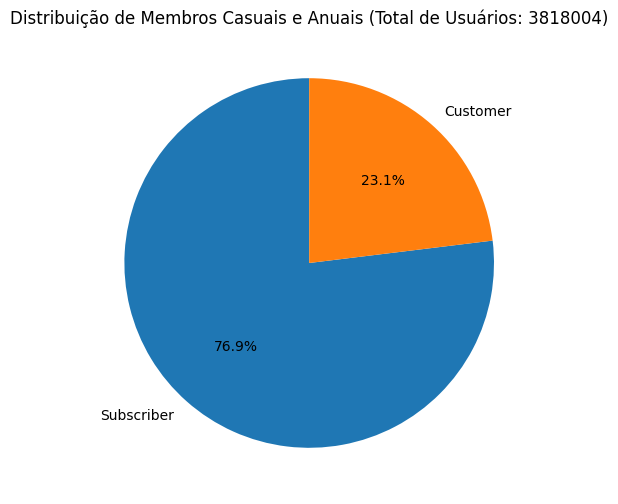

In [30]:
# Contar o número de membros casuais e anuais
user_type_counts = data['usertype'].value_counts()

# Criar gráfico de pizza com o número total de usuários
plt.figure(figsize=(10, 6))
plt.pie(user_type_counts, labels=user_type_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribuição de Membros Casuais e Anuais (Total de Usuários: {})'.format(len(data)))
plt.show()


## Padrão de Associação com a Assinatura:

### Fidelidade do Cliente:

A alta proporção de assinantes indica uma sólida base de clientes fiéis. Isso pode ser resultado de uma experiência positiva com o serviço, benefícios exclusivos para assinantes ou estratégias bem-sucedidas de retenção de clientes.

### Potencial de Crescimento de Assinantes:

Apesar da predominância de assinantes, a empresa pode explorar oportunidades para atrair mais usuários casuais e convertê-los em assinantes. Campanhas de marketing específicas ou ofertas exclusivas para novos assinantes podem ser eficazes.

### Análise de Comportamento:

É valioso entender o comportamento de viagem dos usuários casuais em comparação com os assinantes. Isso pode ajudar na personalização de ofertas, tornando o serviço mais atraente para diferentes segmentos de usuários.

### Aprimoramento de Benefícios para Assinantes:

Compreender as preferências e padrões de uso dos assinantes pode informar a empresa sobre aprimoramentos nos benefícios oferecidos, visando a manutenção e atração de assinantes.

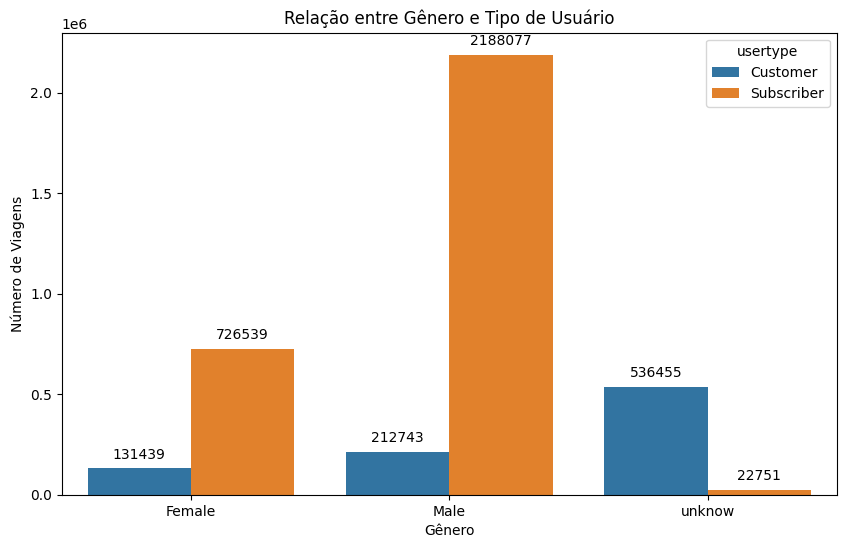

In [29]:
# Contagem de viagens para cada combinação de gênero e tipo de usuário
gender_user_count = data.groupby(['gender', 'usertype']).size().reset_index(name='count')

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='gender', y='count', hue='usertype', data=gender_user_count)

# Adicionar rótulos às barras
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center', xytext = (0, 10),
                     textcoords = 'offset points')

plt.title('Relação entre Gênero e Tipo de Usuário')
plt.xlabel('Gênero')
plt.ylabel('Número de Viagens')

# Salvar as imagens
plt.savefig('genero_x_usuario')

# Exibir o gráfico
plt.show()

## Análise da Distribuição de Gênero

- Das 3.818.004 viagens, as viagens feitas por usúarios membros representam 76.9 das viagens.
- Os usuários masculinos são reponsáveis por 2.188.077 (74,5%) das viagens feitas por membros.
- Enquanto os usuários femininos são responsáveis por 726.539 (24.7%) viagens. 

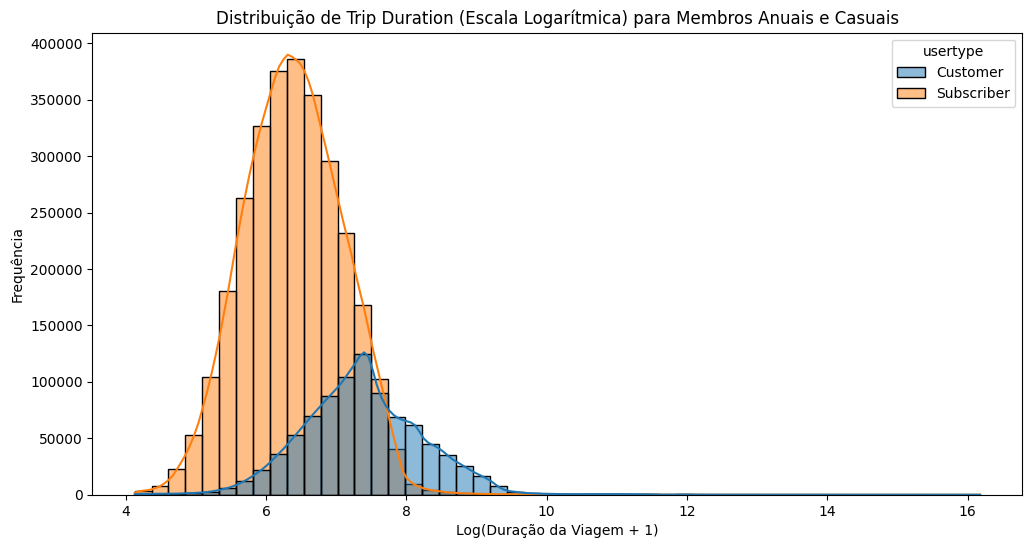

In [20]:
# Aplicar escala logarítmica na duração da viagem
data['log_tripduration'] = np.log1p(data['tripduration'])

# Comparar distribuição de trip duration em escala logarítmica
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='log_tripduration', hue='usertype', bins=50, kde=True)
plt.title('Distribuição de Trip Duration (Escala Logarítmica) para Membros Anuais e Casuais')
plt.xlabel('Log(Duração da Viagem + 1)')
plt.ylabel('Frequência')
plt.show()

Não faço idéia de como interpretar esse gráfico, mas ele ficou muito bonito e usa um log natural e bem, esse é o meu primeiro projeto de análise então não vou tirar ele não u.u

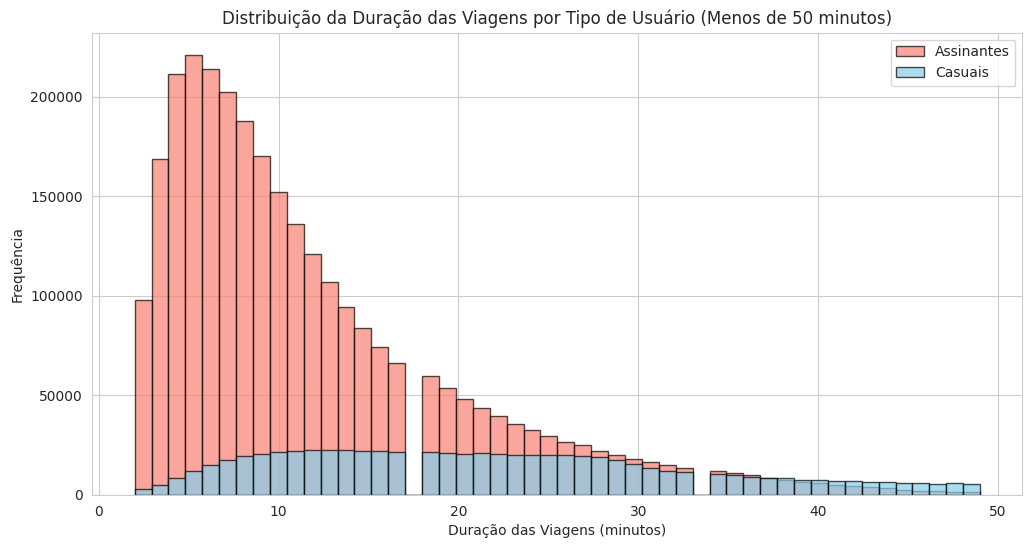

In [55]:
# Filtrar dados para viagens com duração entre 1 e 50 minutos
filtered_data = data[(data['ride_length'] > 1) & (data['ride_length'] < 50)]

# Criar subconjuntos de dados para usuários casuais e assinantes
casual_data = filtered_data[filtered_data['usertype'] == 'Customer']
subscriber_data = filtered_data[filtered_data['usertype'] == 'Subscriber']

# Configurar o layout do gráfico
plt.figure(figsize=(12, 6))

# Plotar histograma para assinantes
plt.hist(subscriber_data['ride_length'], bins=50, color='salmon', edgecolor='black', alpha=0.7, label='Assinantes')

# Plotar histograma para usuários casuais
plt.hist(casual_data['ride_length'], bins=50, color='skyblue', edgecolor='black', alpha=0.7, label='Casuais')

# Adicionar legendas e títulos
plt.title('Distribuição da Duração das Viagens por Tipo de Usuário (Menos de 50 minutos)')
plt.xlabel('Duração das Viagens (minutos)')
plt.ylabel('Frequência')
plt.legend()

# Exibir o gráfico
plt.show()

## Análise da Distribuição das viagens

- Curta Duração (Inferior a 20 minutos): A maior parte das viagens tem duração inferior a 20 minutos. Isso pode indicar que a maioria dos usuários utiliza as bicicletas para deslocamentos curtos, como trajetos entre casa e trabalho, compras rápidas, ou outras atividades de curta duração.

- Variedade nas Durações: O fato de haver uma variedade significativa nas durações das viagens sugere que as bicicletas são utilizadas para diferentes propósitos. Algumas viagens podem ser muito curtas, enquanto outras podem ser mais longas, atendendo a diversas necessidades de mobilidade.

- Igualdade na Utilização após 30 minutos: Notou-se que, a partir de 30 minutos de duração, a quantidade de usuários se torna semelhante. Isso pode indicar que uma parte dos usuários opta por utilizar as bicicletas por períodos mais longos, possivelmente para passeios ou trajetos mais extensos.

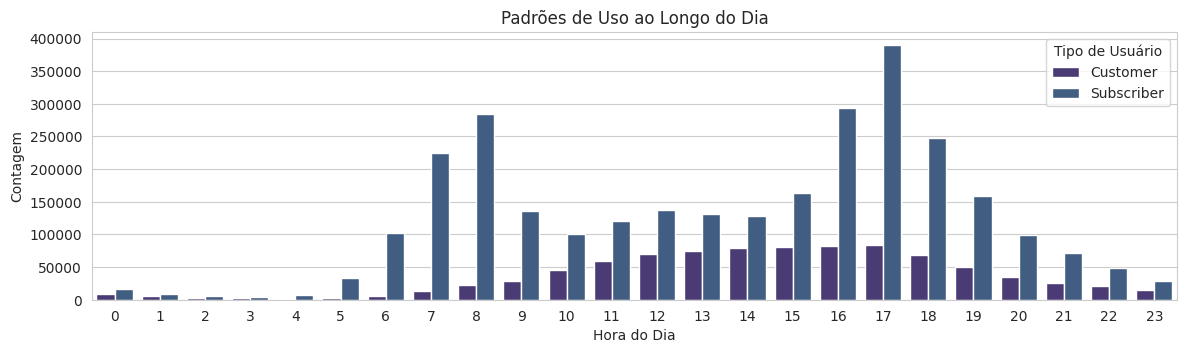

In [42]:
# Criar coluna 'hour' para representar a hora do dia
data['hour'] = data['start_time'].dt.hour

# Configurações visuais
sns.set_style("whitegrid")
sns.set_palette("viridis")

# Plotar padrões de uso ao longo do dia
plt.figure(figsize=(14, 16))

plt.subplot(4, 1, 1)
sns.countplot(x='hour', data=data, hue='usertype')
plt.title('Padrões de Uso ao Longo do Dia')
plt.xlabel('Hora do Dia')
plt.ylabel('Contagem')
plt.legend(title='Tipo de Usuário')

## Análise dos Padrões de Uso

- Ambos os grupos têm um aumento de uso pela manhã, indicando prováveis deslocamentos para o trabalho ou outras atividades diurnas.
- Ciclistas casuais mostram uma tendência a picos de uso durante a tarde e no início da noite, indicando possível uso recreativo.
- Membros anuais mantêm uma distribuição mais estável ao longo do dia.
- Ciclistas casuais tendem a mostrar variações mais acentuadas durante o dia, sugerindo uso mais flexível e recreativo.
- Membros anuais mantêm padrões mais estáveis, indicando possíveis deslocamentos regulares.


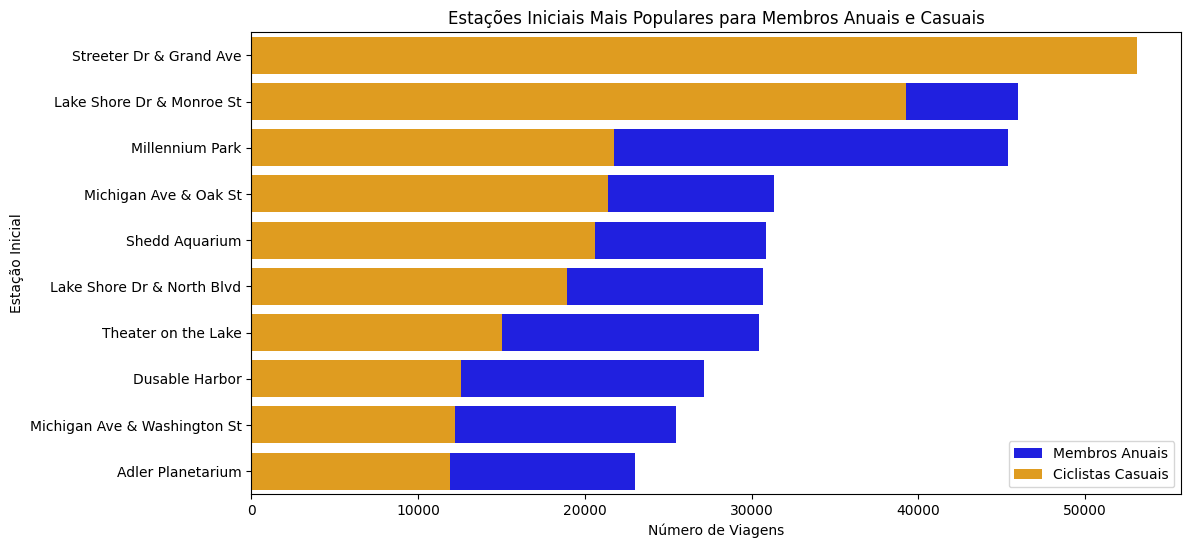

In [18]:
# Estações mais populares para membros anuais
top_start_stations_anual = data[data['usertype'] == 'Subscriber']['from_station_name'].value_counts().head(10)

# Estações mais populares para ciclistas casuais
top_start_stations_casual = data[data['usertype'] == 'Customer']['from_station_name'].value_counts().head(10)

# Visualizar as estações mais populares
plt.figure(figsize=(12, 6))
sns.barplot(x=top_start_stations_anual.values, y=top_start_stations_anual.index, color='blue', label='Membros Anuais')
sns.barplot(x=top_start_stations_casual.values, y=top_start_stations_casual.index, color='orange', label='Ciclistas Casuais')
plt.title('Estações Iniciais Mais Populares para Membros Anuais e Casuais')
plt.xlabel('Número de Viagens')
plt.ylabel('Estação Inicial')
plt.legend()
plt.show()

## Análise das Estações Iniciais mas populares para ambos os tipos de usuários

Streeter Dr & Grand Ave:

- Essa estação pode estar localizada em uma área com alta demanda de usuários, como uma região residencial, comercial ou turística.
- A proximidade com atrativos locais ou áreas de lazer pode torná-la uma escolha popular para iniciar as viagens.

Lake Shore Dr & Monroe St:

- A localização à beira do lago pode tornar essa estação uma opção conveniente para usuários que desejam iniciar viagens ao longo da orla.
- Parques ou atrações próximas podem contribuir para a popularidade desta estação.

Millennium Park:

- Sendo um local icônico e central, o Millennium Park atrai tanto residentes quanto visitantes.
- A estação próxima ao parque pode ser uma escolha conveniente para aqueles que desejam explorar a área ou utilizar bicicletas para lazer.

---

### Possíveis Implicações para a Empresa:

- Localização Estratégica: As estações mais populares estão estrategicamente localizadas em áreas de alta demanda. A empresa pode considerar expandir a presença de estações em áreas semelhantes para atender à demanda crescente.

- Atrações Turísticas: A presença de estações próximas a atrações turísticas indica uma oportunidade para parcerias ou promoções destinadas a turistas.

- Infraestrutura e Manutenção: Dada a popularidade dessas estações, é crucial garantir uma boa infraestrutura e manutenção para oferecer uma experiência positiva aos usuários.

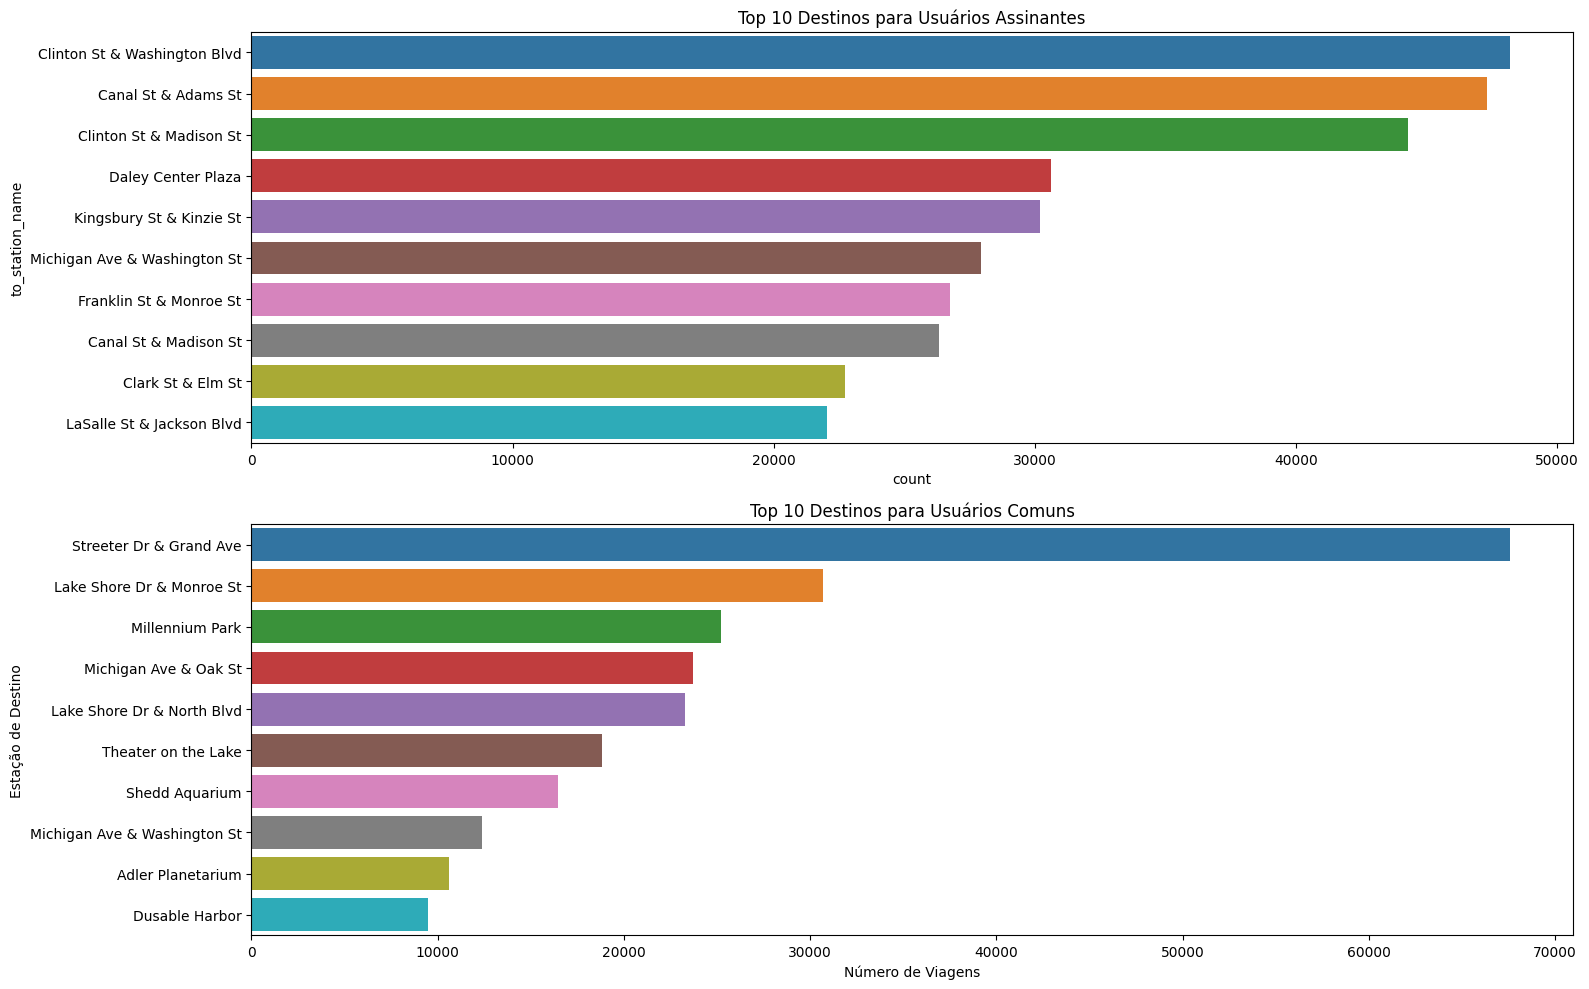

In [37]:
# Calcular contagem de viagens para cada destino por tipo de usuário
destinations_year = data.groupby(['to_station_name', 'usertype']).size().reset_index(name='count')

# Filtrar os 10 destinos mais populares para cada tipo de usuário
top_destinations_subscriber_year = destinations_year[destinations_year['usertype'] == 'Subscriber'].nlargest(10, 'count')
top_destinations_customer_year = destinations_year[destinations_year['usertype'] == 'Customer'].nlargest(10, 'count')

# Criar gráficos de barras separados para cada tipo de usuário
plt.figure(figsize=(16, 10))

plt.subplot(2, 1, 1)
sns.barplot(x='count', y='to_station_name', data=top_destinations_subscriber_year, order=top_destinations_subscriber_year['to_station_name'])
plt.title('Top 10 Destinos para Usuários Assinantes')

plt.subplot(2, 1, 2)
sns.barplot(x='count', y='to_station_name', data=top_destinations_customer_year, order=top_destinations_customer_year['to_station_name'])
plt.title('Top 10 Destinos para Usuários Comuns')

# Ajustes adicionais para legibilidade
plt.xlabel('Número de Viagens')
plt.ylabel('Estação de Destino')
plt.tight_layout()

# Salvar as imagens
plt.savefig('top_destinos_por_user_year.png')
plt.show()

## Os destinos mais populares

### Assinantes:

Clinton St & Washington Blvd:

- Pode ser uma área residencial ou comercial popular entre os assinantes.
- Proximidade a estações de transporte público ou pontos de interesse pode contribuir para a popularidade.

Canal St & Adams St:

- Localizado em uma área comercial ou de negócios, essa estação pode ser frequentemente usada por assinantes que viajam para o trabalho ou reuniões.

Clinton St & Madison St:

- Similar à primeira estação, essa área pode ser residencial ou comercial, sendo conveniente para assinantes.

### Usuários Comuns:

Streeter Dr & Grand Ave:

- Esta estação também é uma das estações iniciais mais populares para ambos os tipos de usuários.
- A localização estratégica próxima a atrações turísticas ou áreas de lazer pode atrair usuários comuns.

Lake Shore Dr & Monroe St:

- Localizado à beira do lago, esse destino pode ser atraente para usuários comuns que desejam desfrutar de passeios ao longo da orla.

Millennium Park:

- Como mencionado anteriormente, o Millennium Park é um local icônico, atraindo tanto assinantes quanto usuários comuns.

--- 

### Possíveis Implicações para a Empresa:

Atendimento às Necessidades Diversificadas: A empresa pode ajustar estratégias de marketing e promoções com base nos destinos populares para atender às necessidades específicas de assinantes e usuários comuns.

Parcerias com Estabelecimentos Locais: Colaborações com estabelecimentos comerciais próximos a destinos populares podem incentivar ainda mais o uso do serviço.

Expansão da Rede de Estações: Se esses destinos continuarem atraindo um grande número de usuários, a empresa pode considerar a expansão da rede de estações nessas áreas.

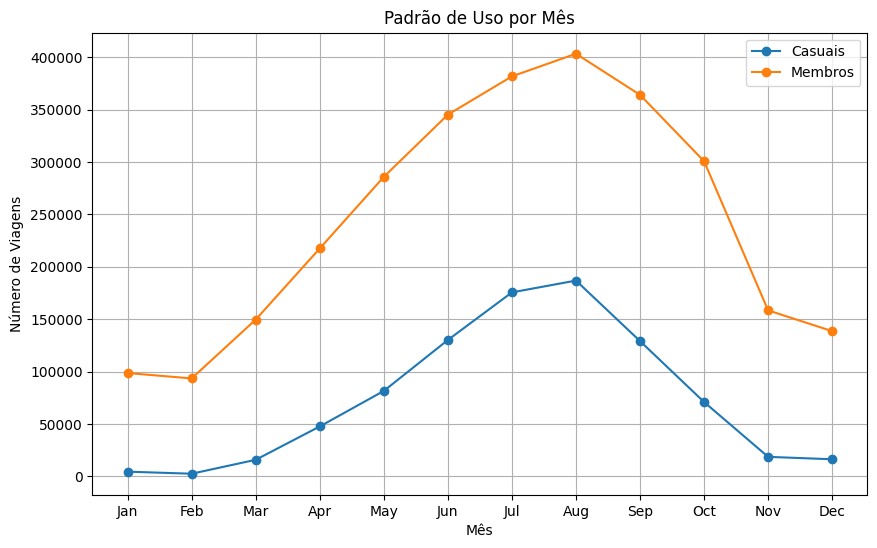

In [33]:
# Extrair o mês da coluna 'start_time'
data['start_month'] = data['start_time'].dt.month

# Criar DataFrame separado para usuários casuais e membros
casual_data = data[data['usertype'] == 'Customer']
member_data = data[data['usertype'] == 'Subscriber']

# Contar o número de viagens por mês para usuários casuais e membros
casual_monthly_counts = casual_data['start_month'].value_counts().sort_index()
member_monthly_counts = member_data['start_month'].value_counts().sort_index()

# Criar um gráfico de linha para usuários casuais e membros
plt.figure(figsize=(10, 6))
plt.plot(casual_monthly_counts.index, casual_monthly_counts.values, marker='o', label='Casuais')
plt.plot(member_monthly_counts.index, member_monthly_counts.values, marker='o', label='Membros')
plt.title('Padrão de Uso por Mês')
plt.xlabel('Mês')
plt.ylabel('Número de Viagens')
plt.xticks(casual_monthly_counts.index, labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.grid(True)
plt.show()


## Padrão de Uso ao Longo do Ano

### Meses Mais Fracos (Janeiro, Fevereiro, Novembro, Dezembro):

Menor demanda durante os meses de inverno.
Possível influência de condições climáticas adversas, como frio intenso.

### Aumento Gradual a Partir de Março:

Nota-se uma recuperação no uso a partir do mês de março.
Possível coincidência com o início da primavera, sugerindo maior disposição dos usuários para atividades ao ar livre.

### Pico de Uso entre Junho e Setembro:

Os meses de verão apresentam os níveis mais altos de utilização.
Clima mais favorável encoraja o uso de bicicletas para lazer e deslocamento.

---

### Implicações para a Empresa:

Com base na análise do padrão de uso ao longo do ano, algumas implicações importantes para a empresa podem ser consideradas:

### Planejamento Operacional:

Durante os meses mais fracos, a empresa pode otimizar operações, considerando uma demanda menor.
Nos meses de pico, estratégias de expansão temporária, como aumento da frota de bicicletas ou pontos de retirada/desembarque, podem ser implementadas.

### Campanhas de Marketing Segmentadas:

A empresa pode desenvolver campanhas de marketing segmentadas, promovendo o serviço de maneira mais intensa nos meses que historicamente mostram maior demanda.
Ofertas especiais ou descontos sazonais podem incentivar o uso durante os períodos mais fracos.

### Manutenção Preventiva:

Durante os meses de menor utilização, pode ser uma oportunidade para realizar manutenção preventiva na frota de bicicletas.
Isso garante que as bicicletas estejam em condições ideais quando a demanda aumentar.

### Engajamento da Comunidade:

Estratégias de engajamento da comunidade podem ser desenvolvidas, como eventos ou parcerias locais, para manter a conscientização sobre o serviço durante todo o ano.